In [1]:
import pandas as pd
import os
from sqlalchemy import create_engine

# === MySQL connection setup ===

username = 'root'
password = 'admin'
host = 'localhost'
port = '3306'
database = 'ecommerce'

# Create connection engine
engine = create_engine(f"mysql+pymysql://{username}:{password}@{host}:{port}/{database}")


In [2]:
# === Folder path and CSV files ===
# folder_path = 'D:/DATA_ANALYST_CHEATSHEET/DATASETS/archive'

# csv_files = [
#     ('customers.csv', 'customers'),
#     ('orders.csv', 'orders'),
#     ('sellers.csv', 'sellers'),
#     ('products.csv', 'products'),
#     ('geolocation.csv', 'delivery'),
#     ('order_items.csv', 'order_items'),
#     ('payments.csv', 'payments')
# ]

In [3]:
# # === Load and insert only first 200 rows ===
# for file_name, table_name in csv_files:
#     file_path = os.path.join(folder_path, file_name)
    
#     print(f"Loading data from {file_path} into '{table_name}' table...")

#     try:
#         df = pd.read_csv(file_path)  
#         df.to_sql(table_name, con=engine, if_exists='replace', index=False)
#         print(f"Successfully loaded data into '{table_name}'")
#     except Exception as e:
#         print(f"Failed to load '{table_name}': {e}")


## 1. List all unique cities where customers are located.

In [4]:
query = '''
 select distinct customer_city from customers
'''
df = pd.read_sql(query,engine)
df

,customer_city
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas
...,...
1589,conceicao do araguaia
1590,abatia
1591,amelia rodrigues
1592,candido rodrigues


## 2. Count the number of orders placed in 2017.

In [5]:
query = '''
select count(*) from orders where year(order_purchase_timestamp) = 2017
'''
df = pd.read_sql(query,engine)
df

,count(*)
0,4541


## 3. Find the total sales per category.


In [6]:
query ='''
select p.product_category, sum(ot.price + ot.freight_value) as total
from products p 
join order_items ot on p.product_id = ot.product_id
group by p.product_category
'''
df = pd.read_sql(query,engine)
df

,product_category,total
0,sport leisure,28714.45
1,perfumery,12365.42
2,toys,15249.26
3,Cool Stuff,18654.24
4,Furniture Decoration,27856.89
...,...,...
56,cine photo,97.88
57,Construction Tools Tools,989.16
58,IMAGE IMPORT TABLETS,483.18
59,flowers,82.51


## 4. Calculate the percentage of orders that were paid in installments.


In [7]:
query = '''
select 
(sum(case when payment_installments >=1 then 1 else 0 end)/count(*))*100 as installments_percent
from payments
'''
df = pd.read_sql(query,engine)
df

,installments_percent
0,100.0


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

## 5. Count the number of customers from each state. 

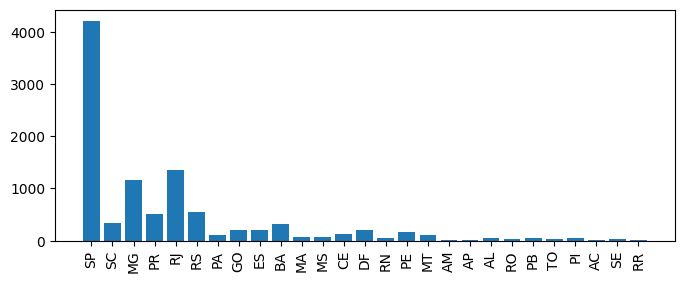

In [9]:
query = '''
select customer_state, count(customer_unique_id) as customer_count
from customers
group by customer_state
'''
df = pd.read_sql(query,engine)
df.sort_values(by='customer_count')
plt.figure(figsize=(8,3))
plt.bar(df['customer_state'], df['customer_count'])
plt.xticks(rotation=90)
plt.show()

## 6. Calculate the number of orders per month in 2018.

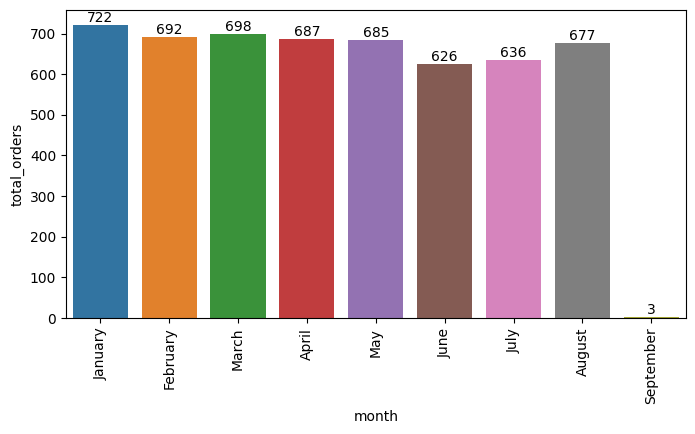

In [10]:
query = '''
select monthname(order_purchase_timestamp) as month, count(*) as total_orders
from orders 
where year(order_purchase_timestamp) = 2018
GROUP BY MONTH(order_purchase_timestamp), MONTHNAME(order_purchase_timestamp)
ORDER BY MONTH(order_purchase_timestamp);
'''
df = pd.read_sql(query,engine)
plt.figure(figsize=(8,4))
ax = sns.barplot(x=df['month'], y=df['total_orders'], data = df)
plt.xticks(rotation=90)
ax.bar_label(ax.containers[0])
plt.show()

## 7. Find the average number of products per order, grouped by customer city.

In [11]:
query = '''
with orders_per_customer as (select o.order_id, o.customer_id,  count(ot.order_id) as cnt
from orders o 
join order_items ot on o.order_id = ot.order_id
group by o.order_id, o.customer_id)

select c.customer_city, round(avg(opc.cnt),2) as avg_no_products
from customers c 
join orders_per_customer opc on c.customer_id = opc.customer_id
group by c.customer_city;
'''
df = pd.read_sql(query,engine)
df

,customer_city,avg_no_products
0,sao paulo,1.33
1,sao jose dos campos,1.00
2,porto alegre,1.00
3,indaial,2.00
4,treze tilias,1.00
5,rio de janeiro,1.00
6,mario campos,1.00
7,guariba,1.00
8,santos,1.00
9,guarulhos,1.00


## 8. Calculate the percentage of total revenue contributed by each product category.

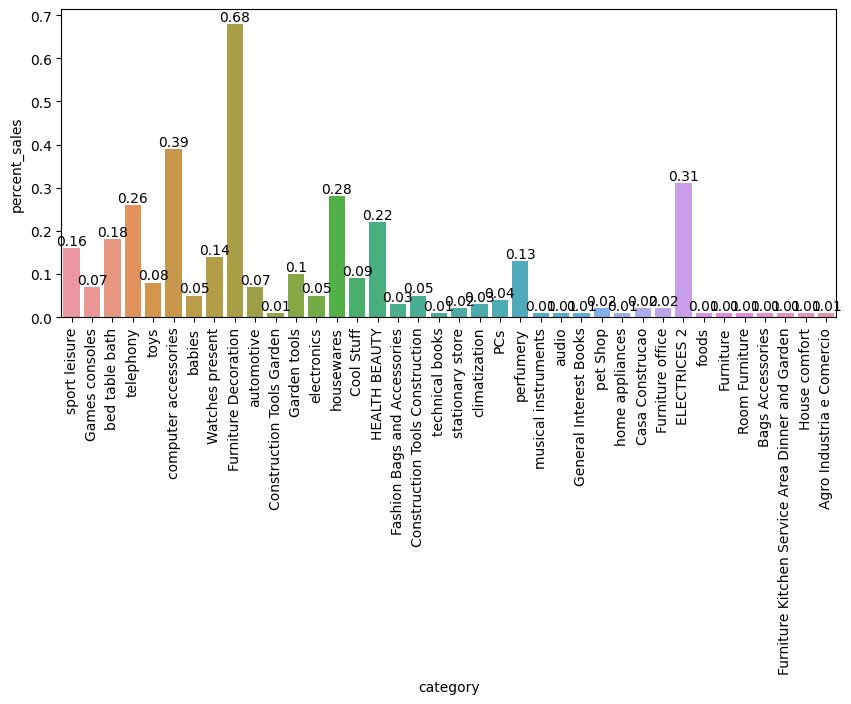

In [12]:
query = '''
select p.product_category as category, 
round((sum(pay.payment_value)/(select sum(payment_value) from payments))*100,2) as percent_sales
from products p 
join order_items ot on p.product_id = ot.product_id
join payments pay on ot.order_id = pay.order_id
group by category
'''
df = pd.read_sql(query,engine)
df
plt.figure(figsize=(10,4))
ax = sns.barplot(x=df['category'], y=df['percent_sales'], data = df)
plt.xticks(rotation=90)
ax.bar_label(ax.containers[0])
plt.show()

## 9. Identify the correlation between product price and the number of times a product has been purchased.

In [13]:
query = '''
select p.product_category as category, count(p.product_id) as total_item_sold,
avg(ot.price) as avg_price
from products p 
join order_items ot on p.product_id = ot.product_id
group by category
'''
df = pd.read_sql(query,engine)
df
# plt.figure(figsize=(10,4))
# ax = sns.barplot(x=df['category'], y=df['percent_sales'], data = df)
# plt.xticks(rotation=90)
# ax.bar_label(ax.containers[0])
# plt.show()

,category,total_item_sold,avg_price
0,sport leisure,221,110.327330
1,perfumery,95,114.590000
2,Furniture Decoration,252,90.467063
3,toys,123,105.847480
4,Cool Stuff,95,172.613474
...,...,...,...
56,cine photo,1,89.990000
57,Construction Tools Tools,6,146.416667
58,IMAGE IMPORT TABLETS,5,83.780000
59,flowers,2,26.345000


## 10. Calculate the total revenue generated by each seller, and rank them by revenue.

In [14]:
query = '''
with cte as (select s.seller_id, round(sum(p.payment_value),2) as revenue
from sellers s
join order_items ot on s.seller_id = ot.seller_id
join payments p on ot.order_id =p.order_id
group by s.seller_id)

select *, 
dense_rank() over (order by revenue desc) as rnk
from cte
'''
df = pd.read_sql(query,engine)
df
# plt.figure(figsize=(10,4))
# ax = sns.barplot(x=df['category'], y=df['percent_sales'], data = df)
# plt.xticks(rotation=90)
# ax.bar_label(ax.containers[0])
# plt.show()

,seller_id,revenue,rnk
0,25c5c91f63607446a97b143d2d535d31,7006.59,1
1,77530e9772f57a62c906e1c21538ab82,3728.69,2
2,eeb6de78f79159600292e314a77cbd18,3572.80,3
3,1025f0e2d44d7041d6cf58b6550e0bfa,3128.45,4
4,1d8dbc4f32378d715c717c1c1fc57bae,2840.00,5
...,...,...,...
477,48efc9d94a9834137efd9ea76b065a38,17.62,469
478,52f0fe436a347ddad7ed5f9aa4e27eaa,16.38,470
479,5def4c3732941a971cba8fdee992ede1,14.89,471
480,e26901d5ab434ce92fd9b5c256820a4e,14.38,472


## 11. Calculate the moving average of order values for each customer over their order history.

In [15]:
query = '''
select customer_id, payment_value,
avg(payment_value) over (partition by customer_id order by order_purchase_timestamp
rows between 2 preceding and current row) as moving_average
from
(select o.customer_id, o.order_purchase_timestamp, p.payment_value
from orders o 
join payments p on o.order_id = p.order_id) a;
'''
df = pd.read_sql(query,engine)
df
# plt.figure(figsize=(10,4))
# ax = sns.barplot(x=df['category'], y=df['percent_sales'], data = df)
# plt.xticks(rotation=90)
# ax.bar_label(ax.containers[0])
# plt.show()

,customer_id,payment_value,moving_average
0,003536ce5e18f1d12b9bf76932f8a6b1,53.33,53.33
1,003e45472805afa1ee701d83284fa22b,30.60,30.60
2,0079368290cd7f161d62e7df9377d8ce,57.42,57.42
3,0080e98d82eceee143dc006defe00687,72.66,72.66
4,0125fdf9e257f064725f85d1d63085b4,48.22,48.22
...,...,...,...
1026,fed93511fb2472a401433bf486958f60,97.78,97.78
1027,fef63fc541ea4380366f67bee5cf11d2,131.75,131.75
1028,ff0a44202beb5310644a0ea439973f4d,53.37,53.37
1029,ff92e1be6dc1bad3695547e321d2003b,146.23,146.23


## 12. Calculate the cumulative sales per month for each year.

In [16]:
query = '''
select year, month, total_sales,
round(sum(total_sales) over(partition by year order by month_no),2) as cumulative_sales
from  (select year(o.order_purchase_timestamp) as year,
month(o.order_purchase_timestamp) as month_no,
monthname(o.order_purchase_timestamp) as month, 
round(sum(p.payment_value),2) as total_sales
from orders o
join payments p on o.order_id  = p.order_id
group by year, month(o.order_purchase_timestamp),monthname(o.order_purchase_timestamp)
order by year, month(o.order_purchase_timestamp)) a;
'''
df = pd.read_sql(query,engine)
df
# plt.figure(figsize=(10,4))
# ax = sns.barplot(x=df['category'], y=df['percent_sales'], data = df)
# plt.xticks(rotation=90)
# ax.bar_label(ax.containers[0])
# plt.show()

,year,month,total_sales,cumulative_sales
0,2016,October,541.77,541.77
1,2017,January,1929.23,1929.23
2,2017,February,4434.99,6364.22
3,2017,March,4044.78,10409.00
4,2017,April,3509.63,13918.63
5,2017,May,4876.92,18795.55
6,2017,June,3994.90,22790.45
7,2017,July,4203.28,26993.73
8,2017,August,7029.69,34023.42
9,2017,September,6235.90,40259.32


## 13. Calculate the year-over-year growth rate of total sales.

In [17]:
query = '''
with CTE as (select year(o.order_purchase_timestamp) as year,
round(sum(p.payment_value),2) as total_sales
from orders o
join payments p on o.order_id  = p.order_id
group by year
order by year)

select year, total_sales,
    coalesce(ROUND(
        (total_sales - LAG(total_sales) OVER (ORDER BY year))*100 / 
        LAG(total_sales) OVER (ORDER BY year), 
    2),0) as YOY_growth
from cte;
'''
df = pd.read_sql(query,engine)
df

,year,total_sales,YOY_growth
0,2016,541.77,0.00
1,2017,69913.22,12804.59
2,2018,82001.84,17.29


## 14. Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

In [18]:
query = '''
with CTE as (select customer_id, min(order_purchase_timestamp) as first_order
from orders
group by customer_id)

select o.customer_id, count(distinct o.order_purchase_timestamp) as total
from cte c 
join  orders o on c.customer_id = o.customer_id
and o.order_purchase_timestamp > first_order 
and o.order_purchase_timestamp < date_add(c.first_order, interval 6 month)
group by o.customer_id
'''

df = pd.read_sql(query,engine)
df


,customer_id,total


## 15. Identify the top 3 customers who spent the most money in each year.

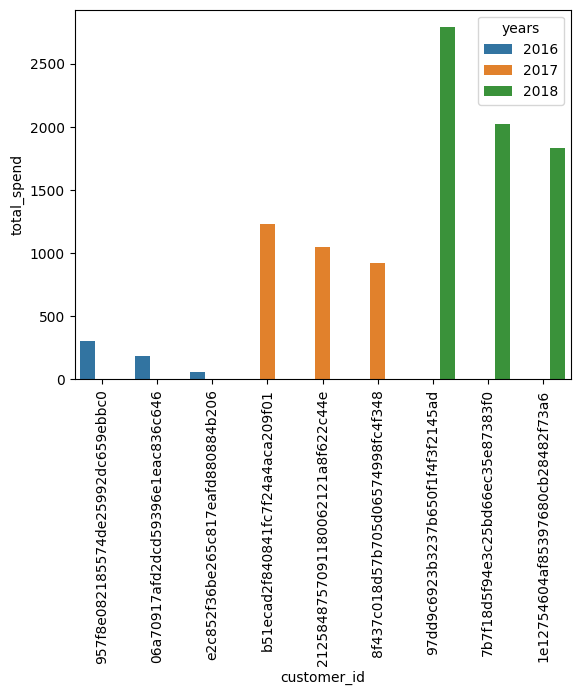

In [19]:
query = '''
select years, customer_id, total_spend, rnk 
from 
(select year(o.order_purchase_timestamp) as years, o.customer_id, sum(p.payment_value) as total_spend,
dense_rank() over(partition by year(o.order_purchase_timestamp) order by sum(p.payment_value) desc) as rnk
from orders o
join payments p on o.order_id = p.order_id
group by year(o.order_purchase_timestamp),o.customer_id) a
where rnk<=3

'''
df = pd.read_sql(query,engine)
df
sns.barplot(x=df['customer_id'], y=df['total_spend'], data = df, hue='years')
plt.xticks(rotation = 90)
plt.show()